---
title: "Modul 3 Struktur Data: Linked List dan Graphviz"
subtitle: "Singly Linked List, Doubly Linked List, Circular Linked List, dan Visualisasi dengan Graphviz"
image: https://raw.githubusercontent.com/aslab-math-ui/asset/main/struktur_data/static/linked_list.png
description: "Offline di Departemen Matematika"
date: 09/29/2025
page-navigation: true
format: html
---

Kembali ke [Struktur Data](./strukdat2025.qmd)

Pada praktikum kali ini, kita akan membahas mengenai *linked list*, serta cara memvisualisasikannya menggunakan yang namanya Graphviz.

Sebelum mengikuti praktikum ini, ada baiknya kalian me-*review* kembali modul berikut:

* [Modul 2: Pengantar OOP](./modul2.ipynb)

Untuk apa? Kita akan menyusun struktur data *linked list* menggunakan `class` :) semoga kalian sudah cukup paham tentang `class` yaa. Kalau belum pun, semoga kalian akan lebih paham setelah praktikum kali ini :D

# *(Singly) Linked List*

*Singly-linked list* (seringkali disebut *linked list* saja) adalah semacam "rantai" dari *node*, di mana tiap *node* berisi 2 nilai, yaitu `data` dan `next` (yaitu *pointer* ke *node* lain). *Node* yang paling pertama itu ditunjuk oleh suatu *pointer* bernama `head`, yang menjadi awal dari *linked list*.

(Terkadang, *pointer* `next` ditulis `LINK`. Artinya dan kegunaannya sama.)

Pertama-tama, kita buat struktur *node* terlebih dahulu menggunakan `class`. (Apabila *pointer* `next` tidak menunjuk ke apapun, biasanya ditulis `NULL` atau di sini `None`.)

Biasanya, di kuliah, disebutnya `class Node` atau `Node` saja. Namun, berhubung modul ini akan membahas *doubly-linked list* dengan struktur yang agak berbeda, maka *node* untuk *singly-linked list* akan kita sebut `SLNode` (*singly-linked node*) agar berbeda.

In [1]:
class SLNode:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

Kita bisa bermain-main dengan *node* ini sebagaimana yang dibahas di kuliah. Misalnya, kita buat *node* baru yang menyimpan data 15:

In [2]:
p = SLNode(15)

Saat ini, *node* tersebut ditunjuk oleh *pointer* yang di sini kita sebut `p`. Secara tidak langsung, kita telah membuat *linked list* dengan `head` nya adalah `p`.

Kita bisa mengakses data yang disimpan di `data` dan juga alamat yang tersimpan di `next`:

In [3]:
print(p.data)

15


In [4]:
print(p.next)

None


Saat ini, *node* yang ditunjuk oleh `p` itu belum menunjuk ke manapun, sehingga `p.next` masih bernilai `None`.

Kita bisa melihat alamat dari *node* itu sendiri menggunakan `id`:

In [5]:
print(id(p))

1939465782336


Alamat ini akan selalu berbeda tiap kali kita membuat *node* baru, dan di antara dua komputer kemungkinan besar juga berbeda. Memang wajar apabila alamat yang kalian dapatkan itu berbeda dengan yang tertera di modul.

Namun, alamat biasanya ditampilkan dalam bentuk heksadesimal (*base-16*), sedangkan yang kita dapatkan dengan `id` masih berupa bilangan bulat desimal (*base-10*). Kita bisa menggunakan `hex` untuk mengubah *base-10* menjadi *base-16*:

In [6]:
print(hex(id(p)))

0x1c3912b4440


Awalan `0x` itu hanya penanda bahwa bilangannya berupa heksadesimal.

Selanjutnya, kita bisa membuat *node* baru di `p.next`, yaitu yang ditunjuk oleh `p`, sebagai berikut:

In [7]:
p.next = SLNode(28)

Sehingga, data 28 itu bisa diakses dari `p` seperti berikut:

In [8]:
print(p.next.data)

28


Sedangkan, setelah *node* berisi 15 dan *node* berisi 28, belum ada *node* lagi, sehingga:

In [9]:
print(p.next.next)

None


Mari kita buat *node* baru lagi setelah *node* berisi 28:

In [10]:
p.next.next = SLNode(-3)

Sehingga, kita bisa mengakses data masing-masing *node* dari `p`:

In [11]:
print(p.data)
print(p.next.data)
print(p.next.next.data)

15
28
-3


Kita bisa juga membuat *pointer* baru yang menunjuk ke *node* yang sudah ada. Misalnya, kita bisa membuat *pointer* bernama `q` yang menunjuk ke *node* yang berisi 28, seperti berikut:

In [12]:
q = p.next

Sehingga, `p.next.next` bisa diakses dengan `q.next`:

In [13]:
print(p.next.next.data)
print(q.next.data)

-3
-3


Bahkan, kita bisa mengubah data -3 menjadi yang lain melalui `q`, dan itu akan berubah juga jika diakses melalui `p`:

In [14]:
q.next.data = -63
print(q.next.data)
print(p.next.next.data)

-63
-63


Kok bisa? Karena, sesuai yang sudah kita tetapkan, `q` menunjuk ke *node* yang sama dengan `p.next`. Kita bisa periksa alamatnya:

In [15]:
print(hex(id(q)))
print(hex(id(p.next)))

0x1c3910bac10
0x1c3910bac10


Sehingga alamat dari *node* yang ditunjuk oleh `q.next` akan sama dengan yang ditunjuk oleh `p.next.next`:

In [16]:
print(hex(id(q.next)))
print(hex(id(p.next.next)))

0x1c3914c0f50
0x1c3914c0f50


Sejauh ini, kita sudah bermain dengan *node* dan membuat *linked list* secara manual. Sebenarnya, kita juga bisa membuat suatu `class` untuk suatu *linked list* secara keseluruhan. Di dalam `class` itu, kita bisa membuat atribut (variabel) yang menyimpan `head`, serta berbagai *method* (fungsi) untuk algoritma-algoritma operasi dasar yang kita pelajari di kuliah, seperti insert *node* di awal/akhir dan delete *node* di awal/akhir. Dengan begitu, kita bisa menggunakan *linked list* dengan lebih nyaman.

Kita akan menyebutnya `class SLList` (*singly-linked list*).

In [2]:
# Digunakan untuk visualisasi linked list
import graphviz as gv

In [ ]:
class SLList:
    def __init__(self):
        self.head = None

    # Memeriksa apakah linked list kosong
    def is_empty(self):
        if self.head == None:
            return True
        else:
            return False

    # Traversal, hanya untuk menghitung banyaknya node di linked list
    def get_size(self):
        count = 0
        current = self.head
        while current != None:
            count += 1
            current = current.next
        return count

    # Traversal, print masing-masing data node dari awal sampai akhir
    def print_all(self):
        print("head -> ", end="")
        temp = self.head
        while temp != None:
            print(temp.data, end = " -> ")
            temp = temp.next
        print("None")

    # Traversal, semacam linear search, cari letak node dengan data tertentu
    def get_pos(self, x):
        pos = -1
        current = self.head
        while current != None:
            pos += 1
            if current.data == x:
                return pos
            current = current.next
        return -1

    # Insert node baru di depan
    def ins_front(self, newdata):
        newnode = SLNode(newdata)
        newnode.next = self.head
        self.head = newnode

    # Insert node baru di belakang, ide nya perlu dilakukan traversal hingga node terakhir kemudian lakukan insert
    def ins_end(self, newdata):
        newnode = SLNode(newdata)
        if self.is_empty():
            self.head = newnode
        else:
            temp = self.head
            while temp.next != None:
                temp = temp.next

            # sekarang temp sudah di node terakhir
            temp.next = newnode

    # Insert node baru di tengah
    def ins_pos(self, newdata, pos):
        if pos == 0:
            self.ins_front(newdata)
        else:
            current_pos = 0
            current = self.head
            while (current != None) and (current_pos != pos-1):
                current = current.next
                current_pos += 1
            # Keluar loop, bisa karena current == None atau current_pos == pos-1
            # Kalau karena current_pos == pos-1, bisa insert
            if (current_pos == pos-1):
                newnode = SLNode(newdata)
                temp = current.next
                current.next = newnode
                newnode.next = temp
            # Tapi kalau karena current == None,
            # berarti posisi yang diminta melampaui panjang linked list
            else:
                print("Error: posisi melebihi panjang linked list")

    # Delete node di depan
    def del_front(self):
        if self.is_empty():
            print("Error: linked list sudah kosong")
        else:
            temp = self.head.next
            del self.head
            self.head = temp

    # Delete node di belakang
    def del_end(self):
        if self.is_empty():
            print("Error: linked list sudah kosong")
        else:
            temp = self.head
            while temp.next.next != None:
                temp = temp.next

            # sekarang temp ada di node sebelum terakhir
            del temp.next
            temp.next = None

    # Delete node di tengah. Mirip ins_pos, hanya berbeda di bagian current_pos == pos-1
    def del_pos(self, pos):
        if pos == 0:
            self.del_front()
        else:
            current_pos = 0
            current = self.head
            while (current != None) and (current_pos != pos-1):
                current = current.next
                current_pos += 1
            # Keluar loop, bisa karena current == None atau current_pos == pos-1
            # Kalau karena current_pos == pos-1, maka bisa dihapus selama
            # current.next yang mau dihapus itu memang ada
            if (current_pos == pos-1) and (current.next != None):
                temp = current.next.next
                del current.next
                current.next = temp
            # Tapi kalau karena current == None, atau current.next tidak ada,
            # berarti posisi yang diminta melampaui panjang linked list
            else:
                print("Error: posisi melebihi panjang linked list")

    # Menghapus semua node di linked list
    def del_all(self):
        while (not self.is_empty()):
            self.del_front()

    # Method untuk memperoleh digraph yang menggambarkan linked list nya :D
    def get_digraph(self):
        # Buat digraph baru yang sifatnya dari kiri ke kanan
        new_digraph = gv.Digraph(graph_attr={"rankdir": "LR"})

        # Pointer untuk menunjuk ke tiap node, mulai dari node pertama
        # (akan dilakukan traversal)
        current = self.head

        # Untuk menghitung node ke-sekian untuk nama node di Graphviz,
        # sehingga head menunjuk ke node0, lalu node0 menunjuk ke node1, dst
        counter = 0

        # Memperoleh alamat yang sedang disimpan di head
        # - asumsi awal: tidak ada alamat (None)
        next_id = None
        next_name = "node0" # ini nanti untuk nama node berikutnya di Graphviz
        # - kalau ternyata ada alamat...
        if current != None:
            # maka simpan alamat tersebut
            next_id = hex(id(current))
            # kita buat lebih spesifik untuk node berikutnya, tunjuk ke port id
            next_name = "node0:id"

        # Label (tabel) untuk pointer head
        # - pembuka tabel
        str_label = "<"
        str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # - baris head
        str_label += "<TR><TD>head</TD></TR>"
        # - baris alamat (sekalian membuat port namanya "contents")
        str_label += "<TR><TD PORT=\"contents\">" + str(next_id) + "</TD></TR>"
        # - penutup tabel
        str_label += "</TABLE>"
        str_label += ">"

        # Membuat node head, membuat edge dari head ke node berikutnya
        new_digraph.node("head", shape="none", label=str_label)
        new_digraph.edge("head:contents", next_name)
        # dari port "contents" ke node berikutnya, yang namanya next_name

        # Selama node yang ditunjuk bukan None, buatlah node nya di Graphviz,
        # lalu lanjut ke node selanjutnya (ini traversal)
        while current != None:
            # Alamat yang tersimpan pada current.next
            # - asumsi awal: tidak ada alamat; current adalah node terakhir
            next_id = None
            # - kalau ternyata ada alamat...
            if current.next != None:
                # maka simpan alamat tersebut
                next_id = hex(id(current.next))

            # Persiapan label (tabel) untuk node
            # - pembuka tabel
            str_label = "<"
            str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
            # - baris tulisan "data", "next"
            str_label += "<TR><TD>data</TD><TD>next</TD></TR>"
            # - baris untuk isi data dan isi next
            str_label += "<TR>"
            str_label += "<TD>" + str(current.data) + "</TD>"
            str_label += "<TD PORT=\"next\">" + str(next_id) + "</TD>"
            str_label += "</TR>"
            # - baris tulisan "alamat node", merentang dua kolom
            str_label += "<TR><TD COLSPAN=\"2\">alamat node</TD></TR>"
            # - baris untuk isi alamat node, merentang dua kolom
            str_label += "<TR>"
            str_label += "<TD PORT=\"id\" COLSPAN=\"2\">"
            str_label += str(hex(id(current)))
            str_label += "</TD>"
            str_label += "</TR>"
            # - penutup tabel
            str_label += "</TABLE>"
            str_label += ">"

            # Membuat node baru di Graphviz dengan label (tabel) tersebut
            new_digraph.node("node" + str(counter), shape="none", label = str_label)

            # Menentukan nama dua port yang bakal disambung dengan edge,
            # yaitu (node saat ini):next disambung ke node(berikutnya):id
            # yaitu bagian "next" disambung ke bagian alamat di node berikutnya
            nama_node_next = "node" + str(counter) + ":next"
            if current.next != None:
                nama_alamat_node_berikutnya = "node" + str(counter+1) + ":id"
            # atau ke node(berikutnya) saja tanpa id kalau itu ternyata None,
            # karena None tidak akan memiliki port id
            else:
                nama_alamat_node_berikutnya = "node" + str(counter+1)

            # Menyambung keduanya
            new_digraph.edge(nama_node_next, nama_alamat_node_berikutnya)

            # Lanjut ke node selanjutnya
            current = current.next
            counter += 1
        # Kalau sudah keluar loop, artinya current menunjuk ke None
        # Berarti tinggal membuat "node" terakhir berisi tulisan None
        # (karena sambungannya sudah dibuat di dalam loop, tinggal node nya)
        new_digraph.node("node" + str(counter), shape="none", label="None")

        # Digraph sudah jadi
        return new_digraph

In [4]:
test = SLList()
test.ins_front(5)
test.ins_front(15)
test.ins_front(25)
test.ins_front(35)

In [5]:
test.print_all()

head -> 35 -> 25 -> 15 -> 5 -> None


In [6]:
print(test.get_pos(15))

2


In [7]:
print(test.get_pos(39))

-1


In [8]:
test.ins_end(100)

In [9]:
test.print_all()

head -> 35 -> 25 -> 15 -> 5 -> 100 -> None


In [10]:
test.del_front()
test.del_front()

In [11]:
test.print_all()

head -> 15 -> 5 -> 100 -> None


In [12]:
test.del_pos(3)

Error: posisi melebihi panjang linked list


In [13]:
test.del_pos(2)

In [14]:
test.print_all()

head -> 15 -> 5 -> None


In [15]:
test.ins_pos(-42, 7)

Error: posisi melebihi panjang linked list


In [16]:
test.ins_pos(76, 1)

In [17]:
test.print_all()

head -> 15 -> 76 -> 5 -> None


In [18]:
gambar = test.get_digraph()

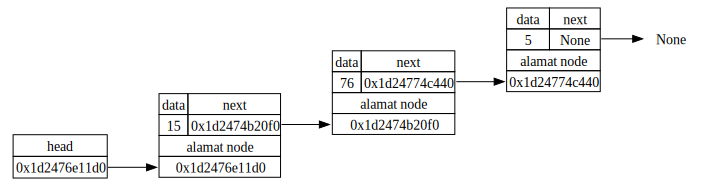

In [19]:
display(gambar)

# *Doubly Linked List*

Pada *singly linked list* setiap node hanya menyimpan satu pointer ke node lainnya, yaitu `next`. Pada *doubly linked list* setiap node menyimpan dua pointer ke node lainnya, yaitu `next` dan `prev`. Dengan penambahan pointer ini kita jadi lebih leluasa untuk mengakses node lain. Namun kekurangannya adalah kita memerlukan alokasi memori tambahan untuk menyimpan alamat `prev`.

In [20]:
class DLNode:
    def __init__(self, data, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev

In [21]:
class DLList:
    def __init__(self):
        self.head = None
        self.tail = None

    # Masih sama persis dengan singly linked list
    def is_empty(self):
        if self.head == None:
            return True
        else:
            return False

    # Traversal, hanya untuk menghitung banyaknya node di linked list
    # Masih sama persis dengan singly linked list
    def get_size(self):
        count = 0
        current = self.head
        while current != None:
            count += 1
            current = current.next
        return count

    # Traversal, print masing-masing data node dari awal sampai akhir
    def print_all(self):
        print("head -> ", end="")
        temp = self.head
        while (temp != None) and (temp.next != None):
            print(temp.data, end = " <-> ")
            temp = temp.next
        # Khusus node terakhir:
        if (temp != None) and (temp.next == None):
            print(temp.data, end = " <- ")
        print("tail")

    def ins_front(self, newdata):
        newnode = DLNode(newdata)
        newnode.next = self.head
        if self.head != None:
            self.head.prev = newnode
        self.head = newnode
        if self.tail == None: # jika tadinya doubly linked list kosong,
            # maka newnode menjadi node pertama, ditunjuk oleh head dan tail
            self.tail = newnode

    # Berbeda dengan singly linked list, tinggal insert di tail;
    # tidak perlu traversal
    def ins_end(self, newdata):
        newnode = DLNode(newdata)
        newnode.prev = self.tail
        if self.tail != None:
            self.tail.next = newnode
        self.tail = newnode
        if self.head == None: # jika tadinya doubly linked list kosong,
            # maka newnode menjadi node pertama, ditunjuk oleh head dan tail
            self.head = newnode

    def ins_pos(self, newdata, pos):
        if pos == 0:
            self.ins_front(newdata)
            return
        n = self.get_size()
        if pos == n:
            self.ins_end(newdata)
        elif pos > n:
            print("Error: posisi melebihi panjang linked list")
        else:
            current_pos = 0
            current = self.head
            while (current_pos != pos-1):
                current = current.next
                current_pos += 1
            # Keluar loop berarti current_pos == pos-1
            newnode = DLNode(newdata)
            newnode.prev = current
            newnode.next = current.next
            current.next = newnode
            # Sudah pasti newnode.next != None,
            # karena kasus pos == n sudah ditangani
            newnode.next.prev = newnode

    def del_front(self):
        if self.is_empty():
            print("Error: linked list sudah kosong")
        else:
            temp = self.head.next
            del self.head
            self.head = temp
            if temp != None:
                temp.prev = None
            else: # jika temp == None, maka self.head == None,
                # berarti sekarang doubly linkd list kosong,
                # sehingga tail juga menunjuk ke None
                self.tail = None

    def del_end(self):
        if self.is_empty():
            print("Error: linked list sudah kosong")
        else:
            temp = self.tail.prev
            del self.tail
            self.tail = temp
            if temp != None:
                temp.next = None
            else: # jika temp == None, maka self.tail == None,
                # berarti sekarang doubly linkd list kosong,
                # sehingga head juga menunjuk ke None
                self.head = None

    def del_pos(self, pos):
        if pos == 0:
            self.del_front()
            return
        n = self.get_size()
        if pos == n-1:
            self.del_end()
        elif pos > n-1:
            print("Error: posisi melebihi panjang linked list")
        else:
            current_pos = 0
            current = self.head
            while (current_pos != pos-1):
                current = current.next
                current_pos += 1
            temp = current.next.next
            del current.next
            current.next = temp
            # Sudah pasti temp != None,
            # karena kasus pos == (n-1) sudah ditangani
            temp.prev = current

    # Method untuk memperoleh digraph yang menggambarkan linked list nya :D
    def get_digraph(self):
        # Buat digraph baru yang sifatnya dari kiri ke kanan
        new_digraph = gv.Digraph(graph_attr={"rankdir": "LR"})

        # Pointer untuk menunjuk ke tiap node, mulai dari node pertama
        # (akan dilakukan traversal)
        current = self.head

        # Untuk menghitung node ke-sekian untuk nama node di Graphviz,
        # sehingga head menunjuk ke node0, lalu node0 menunjuk ke node1, dst
        counter = 0

        # Memperoleh alamat yang sedang disimpan di head
        # - asumsi awal: tidak ada alamat (None)
        next_id = None
        next_name = "node0" # ini nanti untuk nama node berikutnya di Graphviz
        # - kalau ternyata ada alamat...
        if current != None:
            # maka simpan alamat tersebut
            next_id = hex(id(current))
            # kita buat lebih spesifik untuk node berikutnya, tunjuk ke port id
            next_name = "node0:id"

        # Label (tabel) untuk pointer head
        # - pembuka tabel
        str_label = "<"
        str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # - baris head
        str_label += "<TR><TD>head</TD></TR>"
        # - baris alamat (sekalian membuat port namanya "contents")
        str_label += "<TR><TD PORT=\"contents\">" + str(next_id) + "</TD></TR>"
        # - penutup tabel
        str_label += "</TABLE>"
        str_label += ">"

        # Membuat node head, membuat edge dari head ke node berikutnya
        new_digraph.node("head", shape="none", label=str_label)
        new_digraph.edge("head:contents", next_name)
        # dari port "contents" ke node berikutnya, yang namanya next_name

        # Selama node yang ditunjuk bukan None, buatlah node nya di Graphviz,
        # lalu lanjut ke node selanjutnya (ini traversal)
        while current != None:
            # Alamat yang tersimpan pada current.next
            # - asumsi awal: tidak ada alamat; current adalah node terakhir
            next_id = None
            # - kalau ternyata ada alamat...
            if current.next != None:
                # maka simpan alamat tersebut
                next_id = hex(id(current.next))

            # serupa untuk prev
            prev_id = None
            if current.prev != None:
                prev_id = hex(id(current.prev))

            # Persiapan label (tabel) untuk node
            # - pembuka tabel
            str_label = "<"
            str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
            # - baris tulisan "prev", "data", "next"
            str_label += "<TR><TD>prev</TD><TD>data</TD><TD>next</TD></TR>"
            # - baris untuk isi prev, isi data, dan isi next
            str_label += "<TR>"
            str_label += "<TD PORT=\"prev\">" + str(prev_id) + "</TD>"
            str_label += "<TD>" + str(current.data) + "</TD>"
            str_label += "<TD PORT=\"next\">" + str(next_id) + "</TD>"
            str_label += "</TR>"
            # - baris tulisan "alamat node", merentang dua kolom
            str_label += "<TR><TD COLSPAN=\"3\">alamat node</TD></TR>"
            # - baris untuk isi alamat node, merentang dua kolom
            str_label += "<TR>"
            str_label += "<TD PORT=\"id\" COLSPAN=\"3\">"
            str_label += str(hex(id(current)))
            str_label += "</TD>"
            str_label += "</TR>"
            # - penutup tabel
            str_label += "</TABLE>"
            str_label += ">"

            # Membuat node baru di Graphviz dengan label (tabel) tersebut
            new_digraph.node("node" + str(counter), shape="none", label = str_label)

            # Menentukan nama dua port yang bakal disambung dengan edge,
            # yaitu (node saat ini):next disambung ke node(berikutnya):id
            # yaitu bagian "next" disambung ke bagian alamat di node berikutnya
            nama_node_next = "node" + str(counter) + ":next"

            # tambahan untuk doubly linked list
            nama_node_prev = "node" + str(counter) + ":prev"

            if current.next != None:
                nama_alamat_node_berikutnya = "node" + str(counter+1) + ":id"
            # atau ke node(berikutnya) saja tanpa id kalau itu ternyata None,
            # karena None tidak akan memiliki port id
            else:
                nama_alamat_node_berikutnya = "node" + str(counter+1)

            # Menyambung keduanya
            new_digraph.edge(nama_node_next, nama_alamat_node_berikutnya)

            # tambahan untuk doubly linked list
            if current.prev != None:
                nama_alamat_node_sebelumnya = "node" + str(counter-1) + ":id"
            else:
                nama_alamat_node_sebelumnya = "node" + str(counter-1)
            if current == self.head:
                new_digraph.node("node-1", shape="none", label="None")
            new_digraph.edge(nama_node_prev, nama_alamat_node_sebelumnya)

            # Lanjut ke node selanjutnya
            current = current.next
            counter += 1
        # Kalau sudah keluar loop, artinya current menunjuk ke None
        # Berarti tinggal membuat "node" terakhir berisi tulisan None
        # (karena sambungannya sudah dibuat di dalam loop, tinggal node nya)
        new_digraph.node("node" + str(counter), shape="none", label="None")

        # Tambah pointer tail
        # - asumsi awal: tidak ada alamat (None)
        tail_id = None
        tail_name = "node" + str(counter-1) # ini nanti untuk nama node tail
        # - kalau ternyata ada alamat...
        if self.tail != None:
            # maka simpan alamat tersebut
            tail_id = hex(id(self.tail))
            # kita buat lebih spesifik untuk node berikutnya, tunjuk ke port id
            tail_name += ":id"

        # Label (tabel) untuk pointer tail
        # - pembuka tabel
        str_label = "<"
        str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # - baris head
        str_label += "<TR><TD>tail</TD></TR>"
        # - baris alamat (sekalian membuat port namanya "contents")
        str_label += "<TR><TD PORT=\"contents\">" + str(tail_id) + "</TD></TR>"
        # - penutup tabel
        str_label += "</TABLE>"
        str_label += ">"

        # Membuat node tail, membuat edge dari tail ke node nya
        new_digraph.node("tail", shape="none", label=str_label)
        new_digraph.edge("tail:contents", tail_name)
        # dari port "contents" ke node yang ditunjuk tail, namanya tail_name

        # Digraph sudah jadi
        return new_digraph

In [22]:
testDL = DLList()
testDL.ins_front(5)
testDL.ins_front(15)
testDL.ins_front(25)
testDL.ins_front(35)

In [23]:
testDL.print_all()

head -> 35 <-> 25 <-> 15 <-> 5 <- tail


In [24]:
gambarDL = testDL.get_digraph()

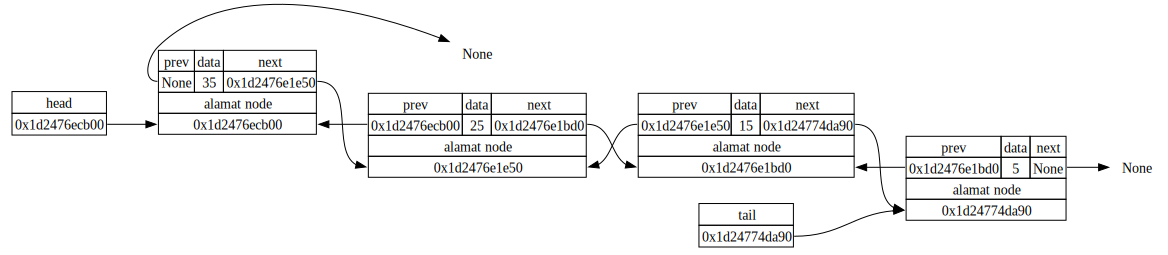

In [25]:
display(gambarDL)

# (Singly) Circular Linked List

Selanjutnya kita akan bahas mengenai variasi lain dari *linked list*, yaitu *circular linked list*. Jika sebelumnya node paling belakang pada suatu *linked list* tidak menyimpan referensi ke node manapun (`None`), pada *circular linked list* node paling belakang akan menyimpan referensi ke node paling depan sehingga membentuk lingkaran rantai yang tidak terputus. 

Pada *linked list* biasa, kita menggunakan `head`, yang menunjuk ke node pertama, sebagai referensi utama. Namun pada *circular linked list*, karena sifatnya yang melingkar, jika kita buat pointer utama kita ke node manapun akan sama saja. Untuk memudahkan, kita akan buat pointer utama kita menunjuk ke elemen terakhir dalam *linked list*.

In [29]:
class CSLNode:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

In [137]:
class CSLList:
    def __init__(self):
        self.tail = None

    # Memeriksa apakah linked list kosong
    def is_empty(self):
        if self.tail == None:
            return True
        else:
            return False

    # Jika sebelumnya kita traversal hingga menemukan None, sekarang traversal hingga menemukan head
    def get_size(self):
        count = 0
        if self.tail.next == self.tail:
            count = 1
            return count
        current = self.tail.next
        while current != self.tail.next:
            count += 1
            current = current.next
        return count

    # Traversal, print masing-masing data node dari awal sampai akhir
    def print_all(self):
        if self.is_empty():
            print("None <- Tail")
        else:
            print("Tail.next -> ", end="")
            temp = self.tail.next
            while temp != self.tail:
                print(temp.data, end = " -> ")
                temp = temp.next
            print(self.tail.data, "<- Tail")

    # Traversal, semacam linear search, cari letak node dengan data tertentu
    def get_pos(self, x):
        pos = -1
        current = self.tail.next
        while current != self.tail.next:
            pos += 1
            if current.data == x:
                return pos
            current = current.next
        return -1

    # Insert node baru didepan atau belakang sama saja, bedanya adalah apakah pointer utama kita berubah atau tidak
    # namun kita juga perlu menyambungkan node di belakang ke node baru
    def ins_front(self, newdata):
        newnode = CSLNode(newdata)
        if self.is_empty():
            self.tail = newnode
            newnode.next = self.tail
        else:
            newnode.next = self.tail.next
            self.tail.next = newnode

    def ins_end(self, newdata):
        newnode = CSLNode(newdata)
        if self.is_empty():
            self.tail = newnode
            newnode.next = self.tail
        else:
            newnode.next = self.tail.next
            self.tail.next = newnode
            self.tail = newnode

    # Insert node baru di tengah
    def ins_pos(self, newdata, pos):
        if pos == 0:
            self.ins_front(newdata) 
        elif pos == self.get_size():
            self.ins_end(newdata)
        else:
            current_pos = 0
            current = self.tail.next
            while (current != self.tail.next) and (current_pos != pos-1):
                current = current.next
                current_pos += 1
            # Keluar loop, bisa karena current == None atau current_pos == pos-1
            # Kalau karena current_pos == pos-1, bisa insert
            if (current_pos == pos-1):
                newnode = SLNode(newdata)
                temp = current.next
                current.next = newnode
                newnode.next = temp
            # Tapi kalau karena current == None,
            # berarti posisi yang diminta melampaui panjang linked list
            else:
                print("Error: posisi melebihi panjang linked list")

    # Delete node di depan
    def del_front(self):
        if self.is_empty():
            print("Error: linked list sudah kosong")
        elif self.get_size() == 1:
            temp = self.tail
            del temp
            self.tail = None
        else:
            # sama saja dengan temp = head.next
            temp = self.tail.next.next
            del self.tail.next
            self.tail.next = temp

    # Delete node di belakang
    def del_end(self):
        if self.is_empty():
            print("Error: linked list sudah kosong")
        elif self.get_size() == 1:
            temp = self.tail
            del temp
            self.tail = None
        else:
            temp = self.tail.next
            while temp.next != self.tail:
                temp = temp.next

            # sekarang temp ada di node sebelum terakhir
            temp.next = self.tail.next
            del self.tail
            self.tail = temp

    # Delete node di tengah. Mirip ins_pos, hanya berbeda di bagian current_pos == pos-1
    def del_pos(self, pos):
        if pos == 0:
            self.del_front()
        elif pos == self.get_size():
            self.del_end()
        else:
            current_pos = 0
            current = self.tail.next
            while (current != None) and (current_pos != pos-1):
                current = current.next
                current_pos += 1
            # Keluar loop, bisa karena current == None atau current_pos == pos-1
            # Kalau karena current_pos == pos-1, maka bisa dihapus selama
            # current.next yang mau dihapus itu memang ada
            if (current_pos == pos-1) and (current.next != None):
                temp = current.next.next
                del current.next
                current.next = temp
            # Tapi kalau karena current == None, atau current.next tidak ada,
            # berarti posisi yang diminta melampaui panjang linked list
            else:
                print("Error: posisi melebihi panjang linked list")

    # Menghapus semua node di linked list
    def del_all(self):
        while (not self.is_empty()):
            self.del_front()

    # Method untuk memperoleh digraph yang menggambarkan linked list nya :D
    def get_digraph(self):
        # Buat digraph baru yang sifatnya dari kiri ke kanan
        new_digraph = gv.Digraph(graph_attr={"rankdir": "LR"})

        if self.is_empty():
            return new_digraph
        # Pointer untuk menunjuk ke tiap node, mulai dari node pertama
        # (akan dilakukan traversal)
        current = self.tail.next

        # Untuk menghitung node ke-sekian untuk nama node di Graphviz,
        # sehingga head menunjuk ke node0, lalu node0 menunjuk ke node1, dst
        counter = 0

        # Selama node yang ditunjuk bukan None, buatlah node nya di Graphviz,
        # lalu lanjut ke node selanjutnya (ini traversal)
        while current != self.tail:
            # Alamat yang tersimpan pada current.next
            # - asumsi awal: tidak ada alamat; current adalah node terakhir
            next_id = None
            # - kalau ternyata ada alamat...
            if current.next != self.tail:
                # maka simpan alamat tersebut
                next_id = hex(id(current.next))

            # Persiapan label (tabel) untuk node
            # - pembuka tabel
            str_label = "<"
            str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
            # - baris tulisan "data", "next"
            str_label += "<TR><TD>data</TD><TD>next</TD></TR>"
            # - baris untuk isi data dan isi next
            str_label += "<TR>"
            str_label += "<TD>" + str(current.data) + "</TD>"
            str_label += "<TD PORT=\"next\">" + str(next_id) + "</TD>"
            str_label += "</TR>"
            # - baris tulisan "alamat node", merentang dua kolom
            str_label += "<TR><TD COLSPAN=\"2\">alamat node</TD></TR>"
            # - baris untuk isi alamat node, merentang dua kolom
            str_label += "<TR>"
            str_label += "<TD PORT=\"id\" COLSPAN=\"2\">"
            str_label += str(hex(id(current)))
            str_label += "</TD>"
            str_label += "</TR>"
            # - penutup tabel
            str_label += "</TABLE>"
            str_label += ">"

            # Membuat node baru di Graphviz dengan label (tabel) tersebut
            new_digraph.node("node" + str(counter), shape="none", label = str_label)

            # Menentukan nama dua port yang bakal disambung dengan edge,
            # yaitu (node saat ini):next disambung ke node(berikutnya):id
            # yaitu bagian "next" disambung ke bagian alamat di node berikutnya
            nama_node_next = "node" + str(counter) + ":next"
            if current.next != self.tail:
                nama_alamat_node_berikutnya = "node" + str(counter+1) + ":id"
            # atau ke node(berikutnya) saja tanpa id kalau itu ternyata None,
            # karena None tidak akan memiliki port id
            else:
                nama_alamat_node_berikutnya = "node" + str(counter+1)

            # Menyambung keduanya
            new_digraph.edge(nama_node_next, nama_alamat_node_berikutnya)

            # Lanjut ke node selanjutnya
            current = current.next
            counter += 1
        # Kalau sudah keluar loop, artinya current menunjuk ke tail
        # Berarti tinggal menambahkan edge ke node 
        # (karena sambungannya sudah dibuat di dalam loop, tinggal node nya)
        # Memperoleh alamat yang sedang disimpan di head
        # - asumsi awal: tidak ada alamat (None)
        next_id = None
        next_name = "node" + str(counter) # ini nanti untuk nama node berikutnya di Graphviz
        # - kalau ternyata ada alamat...
        if current == self.tail:
            # maka simpan alamat tersebut
            next_id = hex(id(current.next))
            # kita buat lebih spesifik untuk node berikutnya, tunjuk ke port id
            next_name = "node{counter}:id"

        str_label = "<"
        str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # - baris tulisan "data", "next"
        str_label += "<TR><TD>data</TD><TD>next</TD></TR>"
        # - baris untuk isi data dan isi next
        str_label += "<TR>"
        str_label += "<TD>" + str(current.data) + "</TD>"
        str_label += "<TD PORT=\"next\">" + str(next_id) + "</TD>"
        str_label += "</TR>"
        # - baris tulisan "alamat node", merentang dua kolom
        str_label += "<TR><TD COLSPAN=\"2\">alamat node</TD></TR>"
        # - baris untuk isi alamat node, merentang dua kolom
        str_label += "<TR>"
        str_label += "<TD PORT=\"id\" COLSPAN=\"2\">"
        str_label += str(hex(id(current)))
        str_label += "</TD>"
        str_label += "</TR>"
        # - penutup tabel
        str_label += "</TABLE>"
        str_label += ">"
        # Membuat node baru di Graphviz dengan label (tabel) tersebut
        new_digraph.node("node" + str(counter), shape="none", label = str_label)
        
        # Label (tabel) untuk pointer tail
        # - pembuka tabel
        str_label = "<"
        str_label += "<TABLE BORDER=\"0\" CELLBORDER=\"1\" CELLSPACING=\"0\">"
        # - baris tail
        str_label += "<TR><TD>tail</TD></TR>"
        # - baris alamat (sekalian membuat port namanya "contents")
        str_label += "<TR><TD PORT=\"contents\">" + str(next_id) + "</TD></TR>"
        # - penutup tabel
        str_label += "</TABLE>"
        str_label += ">"

        # Membuat node tail, membuat edge dari tail ke node berikutnya
        new_digraph.node("tail", shape="none", label=str_label)
        new_digraph.edge("tail:contents", "node" + str(counter)+":id")
        new_digraph.edge("node" + str(counter)+":id", "node0:id")

        # Digraph sudah jadi
        return new_digraph

In [138]:
testCLL = CSLList()
testCLL.ins_front(1)
testCLL.ins_front(5)
testCLL.ins_front(10)
testCLL.ins_front(15)

In [139]:
testCLL.print_all()

Tail.next -> 15 -> 10 -> 5 -> 1 <- Tail


In [140]:
gambarCLL = testCLL.get_digraph()

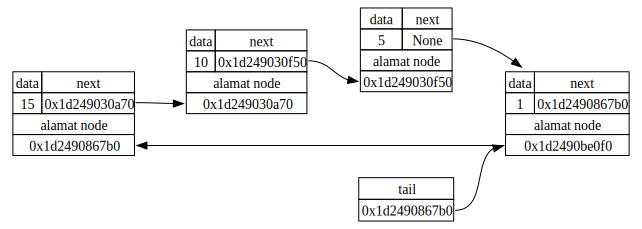

In [141]:
display(gambarCLL)

In [142]:
testCLL.del_end()
testCLL.print_all()

Tail.next -> 15 -> 10 -> 5 <- Tail


In [143]:
testCLL.del_front()
testCLL.print_all()

Tail.next -> 10 -> 5 <- Tail


In [144]:
testCLL.del_all()
testCLL.print_all()

None <- Tail


Kita juga bisa membuat *doubly circular linked list*. Idenya sama seperti sebelumnya, yaitu suatu linked list dimana pointer `next` pada node terakhir menunjuk ke node pertama. Namun ingat pada *doubly linked list* kita juga memiliki pointer `prev`, sehingga pada *doubly circular linked list*, pointer `prev` pada node pertama juga harus menunjuk ke node terakhir. Silahkan kalian coba konstruksi `class` dari *doubly circular linked list* beserta *method*-nya.

# Graphviz (Pengayaan)

Sebelumnya kita telah menggunakan Graphviz untuk membuat visualisasi dari *linked list* yang kita buat. Sekarang mari kita pelajari lebih lanjut mengenai Graphviz ;)

Graphviz adalah semacam *software* yang bisa membuat visualisasi "graf" yang bagus. Mungkin di antara kalian belum semuanya kenal dengan graf, itu tidak masalah. Kurang lebih, suatu graf adalah kumpulan bulet-bulet (disebut simpul, *node*, atau *vertex*) yang disambung oleh "busur" (juga disebut *arc* atau *edge*), di mana tiap *edge* bisa berupa garis biasa atau berupa panah.

Berikut contoh graf yang digambar dengan Graphviz:

```{dot}
digraph "graf G" {
    A -> B;
    B -> A;
    A -> C;
    D -> C [dir=none];
    D -> D;
    D -> E [label="  tes"];
    E -> F;
    B -> F [dir=none];
    GHI -> F [label="qwerty"];
    C -> E [dir=both];
}
```

Lho, di mata kuliah Struktur Data kan ga ada graf. Untuk apa kita pelajari Graphviz?

Dengan Graphviz, kita bisa membuat visualisasi untuk berbagai struktur data nantinya, termasuk *linked list* hari ini. Kita bisa meminta Graphviz untuk membuat bentuk *node* yang tidak sederhana, termasuk bentuk *node* yang kita kenal di *linked list*, kemudian membuat *edge* yang berupa panah, sehingga kita benar-benar bisa menggambarkan suatu *linked list* :)

## Instalasi Graphviz

Sebelum bisa menggunakan Graphviz, perlu di-*install* terlebih dahulu.

Di Google Colaboratory, kalian tinggal mengetik:

`pip install graphviz`

Sedangkan, apabila menggunakan Jupyter Notebook melalui Anaconda, buka Anaconda Prompt lalu ketik:

`conda install graphviz`

Tunggu instalasi selesai, barulah buka Jupyter Notebook dan ketik

`pip install graphviz`

Note:

* Apabila Anda menggunakan Jupyter Notebook tetapi tidak melalui Anaconda, langkah `conda install graphviz` bisa digantikan dengan menginstal Graphviz dari [https://graphviz.gitlab.io/download/](https://graphviz.gitlab.io/download/)

* Untuk penulisan `pip`, ada kemungkinan kalian perlu mengetik `!pip` dengan tanda seru di awal. Biasanya tidak perlu, tapi kalau menjadi *error*, boleh dicoba dengan tanda seru.

## Mengenal Graphviz: *node* dan *edge*

Setelah instalasi selesai, kita bisa import:

In [ ]:
import graphviz as gv

Dengan Graphviz, ada dua jenis gambar graf yang bisa kita buat:

* `Digraph` (graf berarah, yaitu tiap *edge* bisa berupa panah maupun garis biasa)
* `Graph` (graf sederhana, yaitu tiap *edge* hanya bisa berupa garis biasa, bukan panah)

Karena `Digraph` lebih banyak fiturnya, kita akan membuat `Digraph` saja.

Sebagai contoh sederhana, kita bisa membuat `Digraph` yang terdiri dari dua *node* yaitu A dan B, dengan *edge* berupa panah yang menghubungkan A ke B. Kita buat objek `Digraph` terlebih dahulu:

In [ ]:
graf1 = gv.Digraph()

Kemudian, kita bisa menambahkan *node* A dan B sebagai berikut:

In [ ]:
graf1.node("A")
graf1.node("B")

Selanjutnya, kita bisa membuat/menambahkan suatu *edge* dari A ke B, seperti berikut:

In [ ]:
graf1.edge("A", "B")

Sekarang kita bisa lihat grafnya:

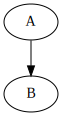

In [ ]:
display(graf1)

Note: apabila fungsi `display` tidak dikenal, silakan import:

`from IPython.display import display`

Sebenarnya, kita bisa saja menambahkan *edge* baru tanpa membuat *node* terlebih dahulu. Contohnya, menambahkan *edge* dari A ke C (suatu *node* baru):

In [ ]:
graf1.edge("A", "C")

Kita bisa lihat lagi:

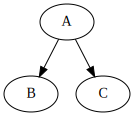

In [ ]:
display(graf1)

Bahkan, kita bisa membuat ulang graf di atas dengan cara seperti berikut:

In [ ]:
graf2 = gv.Digraph()
graf2.edge("A", "B")
graf2.edge("A", "C")

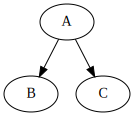

In [ ]:
display(graf2)

Menariknya, kita bisa saja membuat panah yang menunjuk ke dirinya sendiri.

In [ ]:
graf3 = gv.Digraph()
graf3.edge("A", "B")
graf3.edge("B", "B")

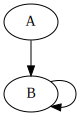

In [ ]:
display(graf3)

Kita juga bisa membuat dua panah berlawanan arah di antara dua *node* seperti berikut:

In [ ]:
graf4 = gv.Digraph()
graf4.edge("A", "B")
graf4.edge("B", "A")

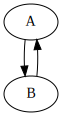

In [ ]:
display(graf4)

Membuat satu panah yang dua arah juga bisa, dengan menentukan `dir` atau *direction* dari *edge* tersebut menjadi `"both"` seperti berikut:

In [ ]:
graf5 = gv.Digraph()
graf5.edge("A", "B", dir="both")

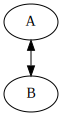

In [ ]:
display(graf5)

Daripada panah, kita juga bisa membuat *edge* berupa garis biasa, dengan `dir="none"` (bukan `None` ya!)

In [ ]:
graf6 = gv.Digraph()
graf6.edge("A", "B", dir="none")

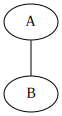

In [ ]:
display(graf6)

Sejauh ini, grafnya selalu cenderung "dari atas ke bawah". Daripada seperti itu, kita bisa mengubahnya menjadi kiri ke kanan untuk keseluruhan graf. Caranya, kita memasang `graph_attr` atau atribut graf, berbentuk `dict`, dan di dalamnya kita buat `"rankdir": "LR"` (*left-right*) seperti di bawah ini.

Setelah objek `Digraph` dibuat, barulah tiap *edge* yang kita tambahkan akan dari kiri ke kanan.

In [ ]:
graf7 = gv.Digraph(graph_attr={"rankdir": "LR"})
graf7.edge("A", "B")

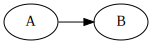

In [ ]:
display(graf7)

Selain *node* diberi nama, *edge* juga bisa diberi keterangan, lho! Caranya, pasang nilai `label` ketika membuat *edge* baru:

In [ ]:
graf8 = gv.Digraph(graph_attr={"rankdir": "LR"})
graf8.edge("A", "B", label="test")

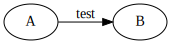

In [ ]:
display(graf8)

Sebenarnya, di dalam suatu *node*, ada yang namanya `name` (atau ID) dan ada juga yang disebut `label`.

* `label` adalah tulisan yang tampil di gambar pada *node* tersebut
* `name` atau ID adalah sebutan yang dikenal oleh Graphviz ketika misalnya ingin membuat *edge*

Selama ini, yang kita tentukan adalah `name`. Kebetulan, khusus *node*, apabila `label` tidak ditentukan, maka otomatis akan diambil dari `name`.

Berikut ini, kita bisa coba menentukan `name` dan `label` sekaligus ketika membuat *node*:

In [ ]:
graf9 = gv.Digraph()
graf9.node("matkul1", label="Alprog")
graf9.node("matkul2", label="Strukdat")
graf9.edge("matkul1", "matkul2")

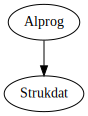

In [ ]:
display(graf9)

Perlu dicatat, apabila kita menambahkan *edge* sekaligus membuat *node* baru, kita tidak bisa memasang `label` untuk *node* baru tersebut.

Sehingga, apabila kalian ingin membuat *node* dengan `label` tertentu, yang nantinya akan disambung ke *node* lain dengan *edge*, maka sebaiknya *node* baru tersebut dibuat dengan `.node()` terlebih dahulu, barulah `name` nya digunakan ketika membuat `.edge()`

Selain itu, bahkan graf itu sendiri juga bisa memiliki nama, yang ditentukan ketika membuat objek grafnya.

In [ ]:
graf10 = gv.Digraph("Nama graf")
graf10.edge("A", "B")
graf10.edge("B", "C")

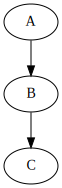

In [ ]:
display(graf10)

Coba letakkan *mouse* kalian pada gambarnya selama beberapa detik. Akan muncul tulisan "Nama graf". (Kalau tidak muncul, coba klik kanan dulu, pencet "Open image in New Tab" atau semacamnya.)

Apabila kalian ingin menentukan misalnya `rankdir`, tuliskan setelah nama grafnya.

In [ ]:
graf11 = gv.Digraph("Graf ke kanan", graph_attr={"rankdir": "LR"})
graf11.edge("A", "B")
graf11.edge("B", "C")

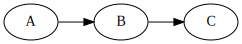

In [ ]:
display(graf11)

## Import/export, bahasa DOT, file `.gv`

Sebenarnya, Graphviz melibatkan yang namanya bahasa DOT (dibaca "dot"), yaitu semacam "bahasa komputer" untuk mendeskripsikan graf, yang kemudian diolah oleh Graphviz menjadi gambar.

(Sebenarnya, bahasa DOT mudah dipahami dan bisa kalian pelajari sendiri kalo iseng :D)

Tiap kali kita membuat graf baru dengan Graphviz melalui Python ini, Graphviz selalu menyusun bahasa DOT terlebih dahulu, baru mengolah bahasa DOT tersebut menjadi gambar.

Kita bisa melihat bahasa DOT untuk tiap graf melalui atribut `.source` seperti berikut:

In [ ]:
print(graf11.source)

digraph "Graf ke kanan" {
	graph [rankdir=LR]
	A -> B
	B -> C
}



Kemudian, kita bisa memasukkan bahasa DOT tersebut ke dalam semacam *software* yang bisa mengolah bahasa DOT menjadi gambar. Contohnya adalah *link* berikut:

[https://dreampuf.github.io/GraphvizOnline/](https://dreampuf.github.io/GraphvizOnline/)

Sebaliknya, dari bahasa DOT, Graphviz juga bisa membuat objek `Digraph` misalnya, menggunakan `graphviz.Source()` seperti berikut:

In [ ]:
graf12 = gv.Source("""
digraph "Graf ke kanan" {
	graph [rankdir=LR]
	A -> B
	B -> C
}
""")

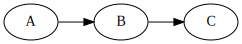

In [ ]:
display(graf12)

Selain import seperti itu, baik bahasa DOT maupun gambar yang dibuat oleh Graphviz bisa di-*export* dengan menetapkan `.format` terlebih dahulu (misalnya "svg" atau "png"), lalu menggunakan `.render()` sebagai berikut:

In [ ]:
graf11.format = "svg"
graf11.render()

'Graf ke kanan.gv.svg'

Maka ada *file* baru yang muncul.

* Apabila menggunakan Google Colaboratory, silakan tekan tombol folder di sebelah kiri.
* Apabila menggunakan Jupyter Notebook, silakan periksa folder yang di dalamnya ada *file* `.ipynb` yang sedang kalian gunakan.

Akan muncul dua *file* baru, yaitu:

1. `Graf ke kanan.gv`
2. `Graf ke kanan.gv.svg`

*File* pertama adalah *file* `.gv` (Graphviz) yang mengandung bahasa DOT yang disusun sebelum diolah menjadi gambar. *File* kedua adalah *file* gambar yang diolah, dalam format sesuai dengan yang kita tentukan.

Kita bisa membaca isi `Graf ke kanan.gv` sebagaimana kita membaca isi *text file*:

In [ ]:
with open("Graf ke kanan.gv", "r") as isi:
    print(isi.read())

digraph "Graf ke kanan" {
	graph [rankdir=LR]
	A -> B
	B -> C
}



Selain itu, perhatikan bahwa nama *file* nya sesuai dengan nama graf yang kita tentukan ketika membuat objek `graf11` tadi. Kalau lupa, kita bisa memeriksa nama graf melalui atribut `.nama`

In [ ]:
print(graf11.name)

Graf ke kanan


Dengan atribut itu pula, kita bisa mengubah nama grafnya:

In [ ]:
graf11.name = "Nama baru"

Sehingga, ketika misalnya Graphviz menyusun bahasa DOT, akan digunakan nama yang baru:

In [ ]:
print(graf11.source)

digraph "Nama baru" {
	graph [rankdir=LR]
	A -> B
	B -> C
}



## Variasi *node* dengan *HTML-like labels*

Ingat atribut `label` yang bisa dipasang ketika membuat suatu *node*? Sebenarnya, kita bisa memanfaatkan atribut tersebut untuk membuat bentuk *node* sesuka hati kita, lho! Terutama, kita bisa membuat *node* dengan bentuk seperti tabel.

Penulisan `label` seperti tabel ini mirip seperti struktur bahasa HTML, sehingga disebut ***HTML-like labels***.

Perhatikan *syntax* (penulisan) berikut.

In [ ]:
graf13 = gv.Digraph()
graf13.node("A", shape="none", label="""<
<TABLE>
    <TR>
        <TD>P</TD>
        <TD>Q</TD>
    </TR>
    <TR>
        <TD>R</TD>
        <TD>S</TD>
    </TR>
</TABLE>
>""")

graf13.node("B") # node biasa
graf13.edge("A", "B")

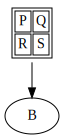

In [ ]:
display(graf13)

Perhatikan,

1. Ketika membuat *node* yang ingin berbentuk tabel, ditambahkan atribut `shape="none"` (bukan `None`) di samping menulis `label` nya.
2. `label` berupa *long string*, sehingga diawali dan diakhiri dengan tiga tanda kutip.
3. Karakter pertama dari *long string* tersebut haruslah `<` dan karakter terakhir haruslah `>`
4. Kemudian, penulisan tabel diawali dengan penulisan `<TABLE>`, kemudian `<TR>` (*table row*) untuk tiap baris, lalu `<TD>` (*table data*) untuk tiap sel. Masing-masing selalu ditutup dengan `</TD>`, `</TR>`, dan `</TABLE>`, bagaikan keberadaan `endif`, `endfor`, `endwhile` dan sebagainya di *pseudocode*.

Agar lebih bagus, di bagian `<TABLE>` kita bisa menambahkan:

`BORDER="0" CELLBORDER="1" CELLSPACING="0"`

Seperti berikut:

In [ ]:
graf14 = gv.Digraph()
graf14.node("A", shape="none", label="""<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
    <TR>
        <TD>P</TD>
        <TD>Q</TD>
    </TR>
    <TR>
        <TD>R</TD>
        <TD>S</TD>
    </TR>
</TABLE>
>""")

graf14.node("B")
graf14.edge("A", "B")

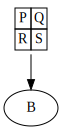

In [ ]:
display(graf14)

Bagaimana kalau misalnya kita ingin panahnya seperti "berasal" dari sel tertentu? Caranya, kita bisa membuat yang namanya `port`, misalnya di sel R, kemudian *edge* yang dibuat akan kita sambung dari port tersebut, seperti berikut:

In [ ]:
graf15 = gv.Digraph()
graf15.node("A", shape="none", label="""<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
    <TR>
        <TD>P</TD>
        <TD>Q</TD>
    </TR>
    <TR>
        <TD PORT="port1">R</TD>
        <TD>S</TD>
    </TR>
</TABLE>
>""")

graf15.node("B")
graf15.edge("A:port1", "B")

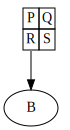

In [ ]:
display(graf15)

Kalau di Microsoft Excel atau Google Sheets, kita bisa melakukan *merge* beberapa sel, entah secara horizontal atau vertikal atau bahkan dua-duanya. Ketika menyusun *HTML-like labels*, kita bisa menggunakan `COLSPAN` (merentang beberapa kolom) dan `ROWSPAN` (merentang beberapa baris) untuk membuat efek seperti di-*merge*.

In [ ]:
graf16 = gv.Digraph()
graf16.node("A", shape="none", label="""<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0">
    <TR>
        <TD ROWSPAN="2">P</TD>
        <TD COLSPAN="2">Q</TD>
    </TR>
    <TR>
        <TD>R</TD>
        <TD>S</TD>
    </TR>
</TABLE>
>""")

graf16.node("B")
graf16.edge("A", "B")

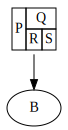

In [ ]:
display(graf16)